In [22]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("../data/regression.csv")

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_ssc = StandardScaler()
x_scaled = x_ssc.fit_transform(x)

x_scaled_tensor = torch.tensor(x_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x_scaled_tensor, y_tensor, test_size=0.2, shuffle=True)

In [24]:
_epochs = 2000

model = nn.Linear(10,1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

for epoch in range(_epochs + 1):
    
    hypothesis = model(x_train)
    cost = F.mse_loss(hypothesis, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}".format(epoch, _epochs, cost.item()))

Epoch    0/2000 Cost: 29452.982422
Epoch  100/2000 Cost: 3153.699463
Epoch  200/2000 Cost: 2702.708496
Epoch  300/2000 Cost: 2692.301758
Epoch  400/2000 Cost: 2691.397949
Epoch  500/2000 Cost: 2690.955078
Epoch  600/2000 Cost: 2690.614502
Epoch  700/2000 Cost: 2690.325928
Epoch  800/2000 Cost: 2690.072021
Epoch  900/2000 Cost: 2689.844238
Epoch 1000/2000 Cost: 2689.636475
Epoch 1100/2000 Cost: 2689.444336
Epoch 1200/2000 Cost: 2689.264160
Epoch 1300/2000 Cost: 2689.094482
Epoch 1400/2000 Cost: 2688.933594
Epoch 1500/2000 Cost: 2688.780029
Epoch 1600/2000 Cost: 2688.632812
Epoch 1700/2000 Cost: 2688.491699
Epoch 1800/2000 Cost: 2688.355713
Epoch 1900/2000 Cost: 2688.224854
Epoch 2000/2000 Cost: 2688.098145


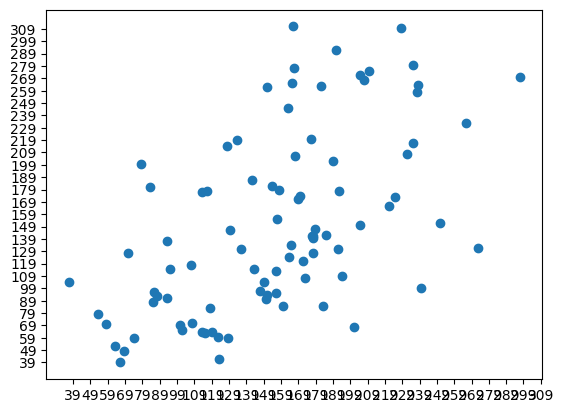

In [25]:
y_pred = model(x_test)
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()

plt.scatter(y_pred, y_test)
plt.xticks(range(int(min(y_test)), int(max(y_test)), 10))
plt.yticks(range(int(min(y_test)), int(max(y_test)), 10))
plt.show()